In [3]:
import torchvision
import torch

In [4]:
transform = torchvision.transforms.Compose(
    transforms=[
    torchvision.transforms.ToTensor(),
]
)

trainset = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [6]:
print("Training images: ", len(trainloader))
print("Test images: ", len(testloader))

Training images:  15000
Test images:  2500


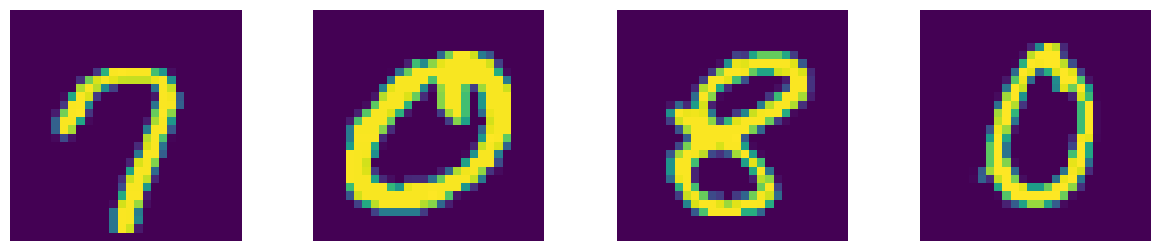

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random
trainiter = iter(trainloader)
images, labels = next(trainiter)

first_batch = images[:4]


fig, axes = plt.subplots(1,4, figsize=(15,3))
for i in range(4):
    reshaped = np.transpose(first_batch[i], (1,2,0))
    plt.imshow(reshaped)
    
    
    axes[i].imshow(reshaped)
    axes[i].axis('off')

plt.show()





In [8]:
print(images[0].size())
print("Min pixel: ", torch.min(images))
print("Max pixel: ", torch.max(images))

torch.Size([1, 28, 28])
Min pixel:  tensor(0.)
Max pixel:  tensor(1.)


In [9]:
for i, (images, labels) in enumerate(trainloader):
    images = images.view(images.size(0), -1)

In [10]:
w1 = torch.randn(784,128)*0.01
b1 = torch.zeros(128)
w2 = torch.randn(128,10)*0.01
b2 = torch.zeros(10)

In [11]:
z1 = torch.matmul(images[0], w1) + b1
a1 = torch.sigmoid(z1)
z2 = torch.matmul(a1, w2) + b2
a2 = torch.sigmoid(z2)

In [ ]:
print("Expected:", labels[0].item())
print("Predicted: ", torch.argmax(a2).item())

Expected: 2
Predicted:  5
Confidence:  tensor([0.5219, 0.5006, 0.5110, 0.4821, 0.5106, 0.5260, 0.5019, 0.4924, 0.5014,
        0.5043])
